<a href="https://www.scinbre.org/learning/bioinformatics-workshops/2024-summer-workshops"><img src="https://i.ibb.co/N6W5kPM/inbre-header.png" alt="inbre-header" border="0"></a>


### Machine Learning in Python
### June 6th, 2024

# First hour - Data Frames with Pandas

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html) is the Excel of Python data science. It is an essential tool for keeping data organized and for data manipulation and analysis. Whether you are cleaning data, transforming it, or performing complex statistical operations, pandas provides the tools needed to efficiently manage and analyze large datasets.

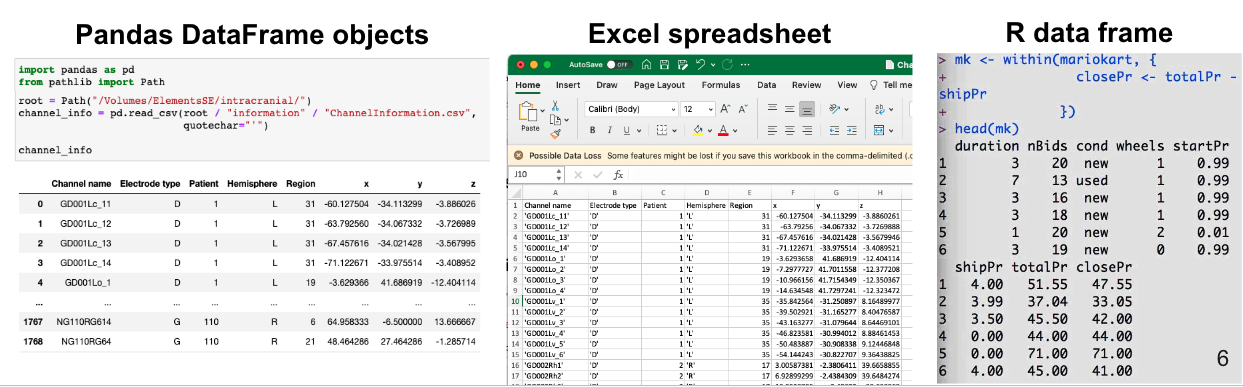

 To start let us import NumPy (from yesterday) and Pandas.

In [1]:
import numpy as np
import pandas as pd

## Pandas Series

The first structure we will learn in Pandas is a Series. It is a one-dimensional array-like object and can hold various data types. It is similar to a list or a one-dimensional NumPy array but with additional features similar to dictionaries. Here are some key characteristics of a Pandas Series:

- **Labels (Indexing)**: Each element in a Series has a unique label that can be used for indexing. By default, the index is a range of integers starting from 0, but you can also specify custom labels, including non-numerical (e.g., strings) labels.
- **Homogeneous Data**: All elements in a Series are of the same data type (as NumPy arrays; as opposed to lists and dictionaries). This type can be generic (i.e., "object"), but the functionalities are reduced in that case.
- **Data Alignment**: Series automatically aligns data based on the index when performing operations with other Series.
- **Computational Efficiency:** Pandas Series is built on the top of NumPy arrays and, therefore, inherits the computational efficiency of the latter.

### Creating Pandas Series

In [2]:
print("From a list:")
data = [10, 20, 30, 40]
series_from_list = pd.Series(data)
print(series_from_list)

From a list:
0    10
1    20
2    30
3    40
dtype: int64


In [3]:
print("From a NumPy array:")
array = np.array([1, 2, 3, 4])
series_from_array = pd.Series(array)
print(series_from_array)

From a NumPy array:
0    1
1    2
2    3
3    4
dtype: int64


In [4]:
print("From a dictionary:")
data_dict = {'a': 1, 'b': 2, 'c': 3}
series_from_dict = pd.Series(data_dict)
print(series_from_dict)

From a dictionary:
a    1
b    2
c    3
dtype: int64


In [5]:
print("From a scalar value (MUST specify index):")
series_from_scalar = pd.Series(5, index=['a', 'b', 'c'])
print(series_from_scalar)

From a scalar value (MUST specify index):
a    5
b    5
c    5
dtype: int64


In [6]:
s = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
print("s = \n", s, sep="")
print(" ")

x = s[1:]   # Same as s, but without the first item ('a')
y = s[:-1]  # Same as s, but without the last item ('e')
print(x + y) #Note how the Series we automatically aligned by index

s = 
a    1
b    2
c    3
d    4
e    5
dtype: int64
 
a    NaN
b    4.0
c    6.0
d    8.0
e    NaN
dtype: float64


Visualization of what is going on here:
```
 Na    |1|    |Na|
|2|    |2|     |4|
|3| +  |3|  =  |6|
|4|    |4|     |8|
|5|     Na    |Na|
```



In [7]:
# Be careful! When indexing with the explicit index,
# the stop argument of the slice is inclusive!!!
s["b":"d"]

b    2
c    3
d    4
dtype: int64

## Pandas DataFrame

A **Pandas DataFrame** is a two-dimensional, tabular data structure with labeled axes (rows and columns). You can think of it as an in-memory representation of an Excel spreadsheet or SQL table. Here are some key characteristics of a DataFrame:

- **Rows and Columns**: DataFrames have both rows and columns, each with labels.
- **Data Types defined by Columns and Rows**: Different rows and columns can have different data types (integers, floats, strings, etc.) from one another. Their type default to the most narrow types able to capture the variability of data. The most generic type is "object". Homogeneous, narrowly defined types provide more functionalities.
- **Labeled Axes**: Both rows and columns have labels, which makes it easier to access and manipulate data.
- **Flexible Indexing**: You can perform operations on DataFrames based on labels (explicit index) or positions (implicit index).


### Creating a DataFrame
You can create a DataFrame from various sources like dictionaries, lists, NumPy arrays, or another DataFrame. Here are some examples:


In [8]:
print("From a dictionary of lists:")
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [15, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(data)
df


From a dictionary of lists:


,Name,Age,City
0,Alice,15,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


In [9]:
print("From a list of dictionaries:")
data = [
    {'Name': 'Alice', 'Age': 15, 'City': 'New York'},
    {'Name': 'Bob', 'City': 'Los Angeles'},  # Keys can be missing, like Age here.
    {'Name': 'Charlie', 'Age': 35, 'City': 'Chicago'}
]
df_from_list_of_dicts = pd.DataFrame(data)
df_from_list_of_dicts

From a list of dictionaries:


,Name,Age,City
0,Alice,15.0,New York
1,Bob,NaN,Los Angeles
2,Charlie,35.0,Chicago


In [10]:
print("From a NumPy array:")
data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
df_from_array = pd.DataFrame(data, columns=['A', 'B', 'C'])
df_from_array


From a NumPy array:


,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


You can treat a DataFrame like a dicionary of Series sharing a same index. Getting, setting, and deleting columns works with the same syntax as it would with a dictionary of columns.

In [11]:
df['Name']

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

Adding a new column:

In [12]:
df["Teens"] = (df["Age"] >= 13) & (df["Age"] < 20)  # & is an element-wise logical AND
df

,Name,Age,City,Teens
0,Alice,15,New York,True
1,Bob,30,Los Angeles,False
2,Charlie,35,Chicago,False


**Note:** Remember that Jupyter notebooks always display what is returned by the last instruction. This display is often "richer" than what you would obtain with a simple print. Notice the difference between this Jupyter internal display and the display obtained with `print()`:

In [13]:
print(df)

      Name  Age         City  Teens
0    Alice   15     New York   True
1      Bob   30  Los Angeles  False
2  Charlie   35      Chicago  False


Removing a column:

In [14]:
del df["Teens"]
df

,Name,Age,City
0,Alice,15,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


### Indexing/selection

The basics of indexing are as follows:

<table style="width:100%;">
<colgroup>
<col style="width: 50%" />
<col style="width: 33%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th>Operation</th>
<th>Syntax</th>
<th>Result</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>Select column</td>
<td><code>df[col]</code></td>
<td>Series</td>
</tr>
<tr class="even">
<td>Select row by label</td>
<td><code>df.loc[label]</code></td>
<td>Series</td>
</tr>
<tr class="odd">
<td>Select row by integer location</td>
<td><code>df.iloc[loc]</code></td>
<td>Series</td>
</tr>
<tr class="even">
<td>Slice rows</td>
<td><code>df[5:10]</code></td>
<td>DataFrame</td>
</tr>
<tr class="odd">
<td>Select rows by boolean vector</td>
<td><code>df[bool_vec]</code></td>
<td>DataFrame</td>
</tr>
</tbody>
</table>

[Taken from https://pandas.pydata.org/docs/user_guide/dsintro.html]

In [15]:
# iloc uses the "implicit index". It operates the same way as the index of numpy array
df.iloc[1]  # Second row

Name            Bob
Age              30
City    Los Angeles
Name: 1, dtype: object

In [16]:
df['Age']  # Column Age

0    15
1    30
2    35
Name: Age, dtype: int64

In [17]:
df.iloc[1,2]  # Second row, third column

'Los Angeles'

An index can be set using the `.set_index()` method

In [18]:
# Setting the column Name as a row index
# Saving the modified DataFrame back in the variable df
df = df.set_index("Name")
df

,Age,City
Name,,
Alice,15,New York
Bob,30,Los Angeles
Charlie,35,Chicago


In [19]:
# Now we can use a more meaningful row index than the
# original numeric one.
# .loc uses the explicit index
df.loc["Bob", "City"]

'Los Angeles'

### Combining Series and DataFrame
Pandas provides various methods for combining Series or DataFrame.

Let us explore one of these! Additional methods are explained in the extra section.

#### Concat
The `pd.concat` function is used to concatenate DataFrames or Series along a particular axis (rows or columns).

In [20]:
df1 = pd.DataFrame(
    {
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
  )

df2 = pd.DataFrame(
    {
      "A": ["A4", "A5", "A6", "A7"],
      "B": ["B4", "B5", "B6", "B7"],
      "C": ["C4", "Cocky", "C6", "C7"],
      "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
  )

print("df1:\n")
df1

df1:



,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [21]:
print("df2:\n")
df2

df2:



,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,Cocky,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [22]:
result = pd.concat([df1, df2], axis=0)# Concatenate along rows
print("Result with axis=0 (along rows):\n")
result

Result with axis=0 (along rows):



,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,Cocky,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [23]:
result = pd.concat([df1, df2], axis=1)# Concatenate along col
print("Result with axis=1 (along columns):\n")
result

Result with axis=1 (along columns):



,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,Cocky,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


## Exercises

1. Create two DataFrames, ```df3``` and ```df4```, with the following data:

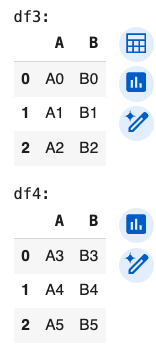

In [24]:
df3 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
})

df4 = pd.DataFrame({
    'A': ['A3', 'A4', 'A5'],
    'B': ['B3', 'B4', 'B5']
})

2. Concatenate df3 and df4 along the rows.

In [25]:
pd.concat([df3, df4])

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
0,A3,B3
1,A4,B4
2,A5,B5


3. Concatenate df3 and df4 along the columns.

In [26]:
pd.concat([df3, df4], axis=1)

,A,B,A,B
0,A0,B0,A3,B3
1,A1,B1,A4,B4
2,A2,B2,A5,B5



4. Concatenate df3 and df4 along the rows using the extra argument `keys=['Group1', 'Group2']` in the `pd.concat` call. Look at what is the effect of this extra argument.

In [27]:
pd.concat([df3, df4], keys=['Group1', 'Group2'])

A   B
Group1 0  A0  B0
       1  A1  B1
       2  A2  B2
Group2 0  A3  B3
       1  A4  B4
       2  A5  B5

5. Create a pandas Series named ```temperatures``` with the following data, where the index represents different cities and the values represent the temperature in Celsius:

New York: 21

Los Angeles: 24

Chicago: 19

Houston: 29

Phoenix: 35

Perform the following tasks:

- a. Print the temperature of Los Angeles.
- b. Update the temperature of Chicago to 20.
- c. Print all temperatures greater than 25.
- d. Add a new city, Miami, with a temperature of 31 to the Series.
- e. Remove the Phoenix entry from the Series.
- f. Print the Series sorted by the city names. Note: we did not discuss the function for sorting series. See if you can find it on Google.






In [28]:
temperatures = pd.Series({
    'New York': 21,
    'Los Angeles': 24,
    'Chicago': 19,
    'Houston': 29,
    'Phoenix': 35
})

# Print the temperature of Los Angeles
print("Temperature in Los Angeles:", temperatures['Los Angeles'])

# Update the temperature of Chicago to 20
temperatures['Chicago'] = 20

# Print all temperatures greater than 25
print("Temperatures greater than 25:\n", temperatures[temperatures > 25])
print('\n')

# Add a new city, Miami, with a temperature of 31
temperatures['Miami'] = 31

# Remove the Phoenix entry from the Series
temperatures = temperatures.drop('Phoenix')

# Print the Series sorted by the city names
print("Sorted Series by city names:\n", temperatures.sort_index())

Temperature in Los Angeles: 24
Temperatures greater than 25:
 Houston    29
Phoenix    35
dtype: int64


Sorted Series by city names:
 Chicago        20
Houston        29
Los Angeles    24
Miami          31
New York       21
dtype: int64


# Second hour - Examples

We will now work with a more complete example. We will download two .csv files. One represents the number of babies born in Canada between years 2015 and 2023. The other represents the number of deaths in Canada for the corresponding years.

In [29]:
#how we load the data
import pandas as pd

# "Statistics Canada. Table 17-10-0016-01  Estimates of births, by gender, annual"
# From https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710001601
url_births = "https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0606_pandas/canada_births.csv"

# "Statistics Canada. Table 17-10-0006-01  Estimates of deaths, by age and gender, annual"
# https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000601
url_deaths = "https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0606_pandas/canada_deaths.csv"

df_b = pd.read_csv(url_births, thousands=",")
# The first argument can be a local file or a URL.
# We used the extra arguments thousands to tell Pandas that this dataset has
# numbers using the comma as a separator for thousands. Otherwise, pandas would not
# recognize these values as numbers and would store them as strings.
# pd.read_csv has MANY bells and whistles to manage various conditions. Use the
# help or the online documentation when necessary.

print(df_b.shape) # Tells us the shape of our data
df_b.head() # Used to display the first rows (5, by default) of a df

(3, 9)


,Gender,2015 / 2016,2016 / 2017,2017 / 2018,2018 / 2019,2019 / 2020,2020 / 2021,2021 / 2022,2022 / 2023
0,Total - gender,384300,380554,377163,373307,371321,362563,364503,357903
1,Men+,196710,195512,193562,191222,190301,186345,187126,183581
2,Women+,187590,185042,183601,182085,181020,176218,177377,174322


This is how we got the table from the Canadian statistics website but we can improve this table by:
1. Using the Gender columns as an index.
2. Transposing the table.
3. Renaming the columns `'total_birth'`, `'men_birth'` and `'women_birth'`


In [30]:
df_b = df_b.set_index("Gender").T  # 1 & 2
df_b.columns = ['total_birth', 'men_birth', 'women_birth']  # 3
df_b

,total_birth,men_birth,women_birth
2015 / 2016,384300,196710,187590
2016 / 2017,380554,195512,185042
2017 / 2018,377163,193562,183601
2018 / 2019,373307,191222,182085
2019 / 2020,371321,190301,181020
2020 / 2021,362563,186345,176218
2021 / 2022,364503,187126,177377
2022 / 2023,357903,183581,174322


In [31]:
df_b.set_index('total birth')

KeyError: "None of ['total birth'] are in the columns"

Now, we load the deaths data:

In [ ]:
df_d = pd.read_csv(url_deaths, thousands=",")
df_d.head() # You can also do .tail() to see the last rows

,Age group 3 7,2015 / 2016,2016 / 2017,2017 / 2018,2018 / 2019,2019 / 2020,2020 / 2021,2021 / 2022,2022 / 2023
0,All ages,262278,274517,283939,283148,297195,307297,319619,330379
1,-1 year 8,1627,1595,1584,1593,1535,1449,1513,1485
2,0 to 4 years,472,457,411,423,425,353,419,433
3,5 to 9 years,159,156,171,162,151,146,166,185
4,10 to 14 years,229,254,252,226,228,271,282,298


Similar to the birth DataFrame, we do some cosmetic improvements:
1. We transpose.
2. We reset the index (which now contains the years) as an ordinary column.
3. We rename the columns using more convenient names.
4. We drop the first row, which now contains the original column names.
5. We set the year column as the new row index.

In [ ]:
df_d = df_d.T.reset_index() # 1 & 2
df_d

,index,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,Age group 3 7,All ages,-1 year 8,0 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,95 to 99 years,100 years and older
1,2015 / 2016,262278,1627,472,159,229,791,1380,1605,1793,...,12929,17316,22241,25358,29743,38558,42336,32377,12250,2544
2,2016 / 2017,274517,1595,457,156,254,771,1383,1727,2061,...,12946,17569,23109,26662,30997,39232,44672,35359,14150,2903
3,2017 / 2018,283939,1584,411,171,252,905,1485,1931,2138,...,13181,18194,23159,28683,32161,39578,46108,36563,15678,3063
4,2018 / 2019,283148,1593,423,162,226,777,1481,1938,2181,...,13080,18175,23057,28792,32898,39282,45379,36230,16108,3099
5,2019 / 2020,297195,1535,425,151,228,807,1446,1932,2292,...,13330,18959,24292,30799,34607,41058,47689,38538,17500,3366
6,2020 / 2021,307297,1449,353,146,271,818,1668,2437,2805,...,14170,19592,25395,32443,36667,41730,46895,38743,17390,3490
7,2021 / 2022,319619,1513,419,166,282,820,1553,2217,2686,...,13633,19972,26428,34365,38907,44106,49036,41115,18634,3983
8,2022 / 2023,330379,1485,433,185,298,865,1576,2321,2814,...,13400,20535,27608,34790,42151,46075,49712,42528,19218,4055


In [ ]:
new_column_names=['year','total_death','-1','0-4','5-9', '10-14', '15-19', '20-24',
                  '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
                  '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94',
                  '95-99','100plus']
df_d.columns = new_column_names # 3
df_d

,year,total_death,-1,0-4,5-9,10-14,15-19,20-24,25-29,30-34,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100plus
0,Age group 3 7,All ages,-1 year 8,0 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,95 to 99 years,100 years and older
1,2015 / 2016,262278,1627,472,159,229,791,1380,1605,1793,...,12929,17316,22241,25358,29743,38558,42336,32377,12250,2544
2,2016 / 2017,274517,1595,457,156,254,771,1383,1727,2061,...,12946,17569,23109,26662,30997,39232,44672,35359,14150,2903
3,2017 / 2018,283939,1584,411,171,252,905,1485,1931,2138,...,13181,18194,23159,28683,32161,39578,46108,36563,15678,3063
4,2018 / 2019,283148,1593,423,162,226,777,1481,1938,2181,...,13080,18175,23057,28792,32898,39282,45379,36230,16108,3099
5,2019 / 2020,297195,1535,425,151,228,807,1446,1932,2292,...,13330,18959,24292,30799,34607,41058,47689,38538,17500,3366
6,2020 / 2021,307297,1449,353,146,271,818,1668,2437,2805,...,14170,19592,25395,32443,36667,41730,46895,38743,17390,3490
7,2021 / 2022,319619,1513,419,166,282,820,1553,2217,2686,...,13633,19972,26428,34365,38907,44106,49036,41115,18634,3983
8,2022 / 2023,330379,1485,433,185,298,865,1576,2321,2814,...,13400,20535,27608,34790,42151,46075,49712,42528,19218,4055


In [ ]:
df_d = df_d.drop(0).set_index("year") # 4 & 5
df_d

,total_death,-1,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100plus
year,,,,,,,,,,,,,,,,,,,,,
2015 / 2016,262278,1627,472,159,229,791,1380,1605,1793,2095,...,12929,17316,22241,25358,29743,38558,42336,32377,12250,2544
2016 / 2017,274517,1595,457,156,254,771,1383,1727,2061,2257,...,12946,17569,23109,26662,30997,39232,44672,35359,14150,2903
2017 / 2018,283939,1584,411,171,252,905,1485,1931,2138,2502,...,13181,18194,23159,28683,32161,39578,46108,36563,15678,3063
2018 / 2019,283148,1593,423,162,226,777,1481,1938,2181,2586,...,13080,18175,23057,28792,32898,39282,45379,36230,16108,3099
2019 / 2020,297195,1535,425,151,228,807,1446,1932,2292,2648,...,13330,18959,24292,30799,34607,41058,47689,38538,17500,3366
2020 / 2021,307297,1449,353,146,271,818,1668,2437,2805,3399,...,14170,19592,25395,32443,36667,41730,46895,38743,17390,3490
2021 / 2022,319619,1513,419,166,282,820,1553,2217,2686,3239,...,13633,19972,26428,34365,38907,44106,49036,41115,18634,3983
2022 / 2023,330379,1485,433,185,298,865,1576,2321,2814,3355,...,13400,20535,27608,34790,42151,46075,49712,42528,19218,4055


If we want, we can also remove the "year" name for the new index.

In [ ]:
df_d.index.name = None
df_d

,total_death,-1,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100plus
2015 / 2016,262278,1627,472,159,229,791,1380,1605,1793,2095,...,12929,17316,22241,25358,29743,38558,42336,32377,12250,2544
2016 / 2017,274517,1595,457,156,254,771,1383,1727,2061,2257,...,12946,17569,23109,26662,30997,39232,44672,35359,14150,2903
2017 / 2018,283939,1584,411,171,252,905,1485,1931,2138,2502,...,13181,18194,23159,28683,32161,39578,46108,36563,15678,3063
2018 / 2019,283148,1593,423,162,226,777,1481,1938,2181,2586,...,13080,18175,23057,28792,32898,39282,45379,36230,16108,3099
2019 / 2020,297195,1535,425,151,228,807,1446,1932,2292,2648,...,13330,18959,24292,30799,34607,41058,47689,38538,17500,3366
2020 / 2021,307297,1449,353,146,271,818,1668,2437,2805,3399,...,14170,19592,25395,32443,36667,41730,46895,38743,17390,3490
2021 / 2022,319619,1513,419,166,282,820,1553,2217,2686,3239,...,13633,19972,26428,34365,38907,44106,49036,41115,18634,3983
2022 / 2023,330379,1485,433,185,298,865,1576,2321,2814,3355,...,13400,20535,27608,34790,42151,46075,49712,42528,19218,4055


Now that the data frames are cleaned up, we can look at the basic statistics and check for missing data.

In [ ]:
print(df_b.describe(),'\n')
print('Total missing:', df_b.isnull().sum(), sep="\n")

         total_birth    men_birth    women_birth
count       8.000000       8.0000       8.000000
mean   371451.750000  190544.8750  180906.875000
std      9218.533642    4631.0339    4601.686785
min    357903.000000  183581.0000  174322.000000
25%    364018.000000  186930.7500  177087.250000
50%    372314.000000  190761.5000  181552.500000
75%    378010.750000  194049.5000  183961.250000
max    384300.000000  196710.0000  187590.000000 

Total missing:
total_birth    0
men_birth      0
women_birth    0
dtype: int64


Now that it all looks good let us combine them into one table. Since the two tables have the same row indexes, we can simply concatenate them horizontally. Note that more complex combinations can be accomplished using the `DataFrame.merge` method, which operates similarly to a SQL join statement.

In [ ]:
df = pd.concat([df_b, df_d], axis=1)
df

,total_birth,men_birth,women_birth,total_death,-1,0-4,5-9,10-14,15-19,20-24,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100plus
2015 / 2016,384300,196710,187590,262278,1627,472,159,229,791,1380,...,12929,17316,22241,25358,29743,38558,42336,32377,12250,2544
2016 / 2017,380554,195512,185042,274517,1595,457,156,254,771,1383,...,12946,17569,23109,26662,30997,39232,44672,35359,14150,2903
2017 / 2018,377163,193562,183601,283939,1584,411,171,252,905,1485,...,13181,18194,23159,28683,32161,39578,46108,36563,15678,3063
2018 / 2019,373307,191222,182085,283148,1593,423,162,226,777,1481,...,13080,18175,23057,28792,32898,39282,45379,36230,16108,3099
2019 / 2020,371321,190301,181020,297195,1535,425,151,228,807,1446,...,13330,18959,24292,30799,34607,41058,47689,38538,17500,3366
2020 / 2021,362563,186345,176218,307297,1449,353,146,271,818,1668,...,14170,19592,25395,32443,36667,41730,46895,38743,17390,3490
2021 / 2022,364503,187126,177377,319619,1513,419,166,282,820,1553,...,13633,19972,26428,34365,38907,44106,49036,41115,18634,3983
2022 / 2023,357903,183581,174322,330379,1485,433,185,298,865,1576,...,13400,20535,27608,34790,42151,46075,49712,42528,19218,4055


Now let us do some data analysis:

1. Adding a column that stores the difference between births and deaths per year
2. Finding the maximum of births and the corresponding year
3. Finding the minimum of deaths and its corresponding year

In [ ]:
df['difference(b-d)'] = df['total_birth'] - df['total_death']
df

KeyError: 'total_birth'

In [ ]:
#Find Max births and its year
max_b_id = df['total_birth'].idxmax()
max_b = df['total_birth'].max()

#Find Min deaths and its year
min_deaths_id = df['total_death'].idxmin()
min_d = df['total_death'].min()

print(f"Year with maximum births: {max_b_id} ({max_b} births)")
print(f"Year with minimum deaths: {min_deaths_id} ({min_d} deaths)")

TypeError: reduction operation 'argmin' not allowed for this dtype

This type of error generally happens when the data type is not what you expect it to be (in this case, numeric). This error happened when trying `.idxmin()` on the column `total_death`. Let us have a look at what type it is.

In [ ]:
df['total_death']

2015 / 2016    262278
2016 / 2017    274517
2017 / 2018    283939
2018 / 2019    283148
2019 / 2020    297195
2020 / 2021    307297
2021 / 2022    319619
2022 / 2023    330379
Name: total_death, dtype: object

The data type is "object". This happens because, at some point, we manipulated this column in a way that it did not have only numerical values, but also some strings. Now that its content is only numerical values, we can convert it back into a data type that will allow mathematical operations.

In [ ]:
df['total_death'] = df['total_death'].astype(int)

In [ ]:
#Find Max births and its year
max_b_id = df['total_birth'].idxmax()
max_b = df['total_birth'].max()

#Find Min deaths and its year
min_deaths_id = df['total_death'].idxmin()
min_d = df['total_death'].min()

print(f"Year with maximum births: {max_b_id} ({max_b} births)")
print(f"Year with minimum deaths: {min_deaths_id} ({min_d} deaths)")

Year with maximum births: 2015 / 2016 (384300 births)
Year with minimum deaths: 2015 / 2016 (262278 deaths)


Well let us make sure we adjust for population.

In [ ]:
url_pop = "https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0606_pandas/canada_pop.csv"

df_pop = pd.read_csv(url_pop).set_index("years")
df_pop.index.name = None
df_pop


,population
2022 / 2023,38454327
2021 / 2022,38155012
2020 / 2021,37888705
2019 / 2020,37522584
2018 / 2019,37035254
2017 / 2018,36554348
2016 / 2017,36113532
2015 / 2016,35732126


In [ ]:
df = pd.concat([df,df_pop],axis=1)
df

,total_birth,men_birth,women_birth,total_death,-1,0-4,5-9,10-14,15-19,20-24,...,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100plus,difference(b-d),population
2015 / 2016,384300,196710,187590,262278,1627,472,159,229,791,1380,...,22241,25358,29743,38558,42336,32377,12250,2544,0,35732126
2016 / 2017,380554,195512,185042,274517,1595,457,156,254,771,1383,...,23109,26662,30997,39232,44672,35359,14150,2903,0,36113532
2017 / 2018,377163,193562,183601,283939,1584,411,171,252,905,1485,...,23159,28683,32161,39578,46108,36563,15678,3063,0,36554348
2018 / 2019,373307,191222,182085,283148,1593,423,162,226,777,1481,...,23057,28792,32898,39282,45379,36230,16108,3099,0,37035254
2019 / 2020,371321,190301,181020,297195,1535,425,151,228,807,1446,...,24292,30799,34607,41058,47689,38538,17500,3366,0,37522584
2020 / 2021,362563,186345,176218,307297,1449,353,146,271,818,1668,...,25395,32443,36667,41730,46895,38743,17390,3490,0,37888705
2021 / 2022,364503,187126,177377,319619,1513,419,166,282,820,1553,...,26428,34365,38907,44106,49036,41115,18634,3983,0,38155012
2022 / 2023,357903,183581,174322,330379,1485,433,185,298,865,1576,...,27608,34790,42151,46075,49712,42528,19218,4055,0,38454327


Now let us get that per capita data.

In [ ]:
df['per_capita_birth'] = df['total_birth'] / df['population']
df['per_capita_death'] = df['total_death'] / df['population']
df

,total_birth,men_birth,women_birth,total_death,-1,0-4,5-9,10-14,15-19,20-24,...,75-79,80-84,85-89,90-94,95-99,100plus,difference(b-d),population,per_capita_birth,per_capita_death
2015 / 2016,384300,196710,187590,262278,1627,472,159,229,791,1380,...,29743,38558,42336,32377,12250,2544,0,35732126,0.010755,0.007340
2016 / 2017,380554,195512,185042,274517,1595,457,156,254,771,1383,...,30997,39232,44672,35359,14150,2903,0,36113532,0.010538,0.007601
2017 / 2018,377163,193562,183601,283939,1584,411,171,252,905,1485,...,32161,39578,46108,36563,15678,3063,0,36554348,0.010318,0.007768
2018 / 2019,373307,191222,182085,283148,1593,423,162,226,777,1481,...,32898,39282,45379,36230,16108,3099,0,37035254,0.010080,0.007645
2019 / 2020,371321,190301,181020,297195,1535,425,151,228,807,1446,...,34607,41058,47689,38538,17500,3366,0,37522584,0.009896,0.007920
2020 / 2021,362563,186345,176218,307297,1449,353,146,271,818,1668,...,36667,41730,46895,38743,17390,3490,0,37888705,0.009569,0.008111
2021 / 2022,364503,187126,177377,319619,1513,419,166,282,820,1553,...,38907,44106,49036,41115,18634,3983,0,38155012,0.009553,0.008377
2022 / 2023,357903,183581,174322,330379,1485,433,185,298,865,1576,...,42151,46075,49712,42528,19218,4055,0,38454327,0.009307,0.008591


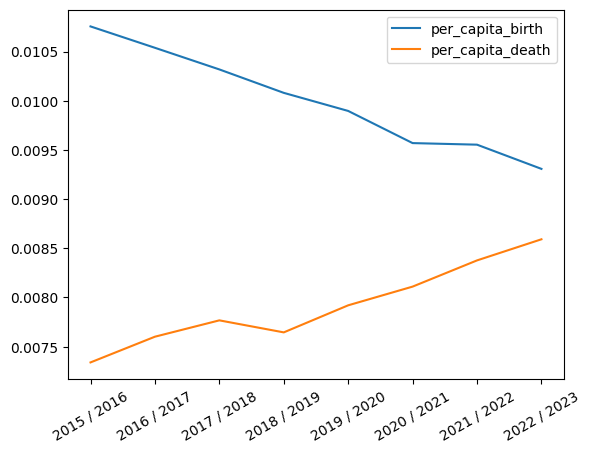

In [ ]:
import matplotlib.pyplot as plt

ax = df.plot(y=["per_capita_birth", "per_capita_death"])
plt.xticks(rotation=30);

Outch! I would not like to be a Canadian!

## Exercises

### Introduction
In this exercise, we will work with the famous Iris dataset. You will practice importing data, displaying it, and performing various analyses using Pandas.

1700911428185.png

[image credit to Pramod Sahu](https://www.linkedin.com/pulse/iris-dataset-analysis-using-machine-learning-techniques-pramod-sahu-g3kgf/)

### Exercise 1: Importing the Data


1.   Import the necessary libraries.
2.   Load the Iris dataset from a CSV file into a Pandas DataFrame.
3.Display the first 10 rows of the DataFrame to understand the structure of the data.

Here is some helper code:

```url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"```

```column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]```





In [ ]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df_iris = pd.read_csv(url, header=None, names=column_names)

# Step 3: Display the first 10 rows of the DataFrame
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Exercise 2: Basic Data Exploration


1.   Display basic statistics of the dataset.
2.   Check for any missing values in the dataset.




In [ ]:
# Step 1: Display basic statistics
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Step 2: Check for missing values
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### Exercise 3: Grouping and Aggregation


1.   Group the data by values of the 'class' column and calculate the mean values for each group.
2.   Find the minimum and maximum values for each numerical column in each class.


Tip: Use ```.groupby('class')```. For help on how to use that method: `?pd.DataFrame.groupby`



In [ ]:
# Step 1: Group by 'class' and calculate mean values
mean_values = df_iris.groupby('class').mean()
mean_values

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
# Step 2: Find minimum and maximum values for each numerical column in each class
min_values = df_iris.groupby('class').min()
max_values = df_iris.groupby('class').max()
print("Minimum values:", min_values, sep="\n")
print()
print("Maximum values:", max_values, sep="\n")

Minimum values:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa               4.3          2.3           1.0          0.1
Iris-versicolor           4.9          2.0           3.0          1.0
Iris-virginica            4.9          2.2           4.5          1.4

Maximum values:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa               5.8          4.4           1.9          0.6
Iris-versicolor           7.0          3.4           5.1          1.8
Iris-virginica            7.9          3.8           6.9          2.5


### Exercise 4: Data Analysis

1.   Find the class with the highest average sepal length.
2.   Identify the class with the smallest average petal width.
3. Calculate the range (max - min) of sepal length for each class.

In [ ]:
# Step 1: Class with the highest average sepal length
highest_avg_sepal_length_class = mean_values['sepal_length'].idxmax()
print(f"Class with the highest average sepal length: {highest_avg_sepal_length_class}")

# Step 2: Class with the smallest average petal width
smallest_avg_petal_width_class = mean_values['petal_width'].idxmin()
print(f"Class with the smallest average petal width: {smallest_avg_petal_width_class}\n\n")

# Step 3: Calculate the range of sepal length for each class
sepal_length_range = max_values['sepal_length'] - min_values['sepal_length']
print("Range of sepal length for each class:")
sepal_length_range

Class with the highest average sepal length: Iris-virginica
Class with the smallest average petal width: Iris-setosa


Range of sepal length for each class:


class
Iris-setosa        1.5
Iris-versicolor    2.1
Iris-virginica     3.0
Name: sepal_length, dtype: float64

# Homework

### Dataset
For this homework, we will use the MPG dataset. This dataset contains the technical specifications of cars originally provided by the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

### Columns Description
- mpg: Miles per gallon (continuous variable).
- cylinders: Number of cylinders of each car.  (discrete variable).
- displacement: [Engine displacement](https://en.wikipedia.org/wiki/Engine_displacement) (continuous variable)
- horsepower: The power produced by the engine (continuous variable)
- weight: Car weight (continuous variable)
- acceleration: the acceleration an engine can get per second (continuous variable)
- model_year: The year the model was released  (discrete variable)
- origin: Car manufacturing place (usa, europe, japan) (categorical variable)
- name: Car model name (unique for each instance)

In [ ]:
import seaborn as sns

# Loading and displaying the dataset
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


1. Using the `groupby()` method of the DataFrame class, compute the mean weight and mpg of the cars listed in df for the different numbers of cylinders. (1 line)

In [ ]:
df.groupby("cylinders")[["weight", "mpg"]].mean()

,weight,mpg
cylinders,,
3,2398.500000,20.550000
4,2308.127451,29.286765
5,3103.333333,27.366667
6,3198.226190,19.985714
8,4114.718447,14.963107


2. Using the `pivot_table` method (`?pd.DataFrame.pivot_table`), create a table
   showing the mean mpg per origin (columns) and years (rows). Save this pivot
   table in a variable weight_mpg_wide and display the result. (2 lines)

In [ ]:
weight_mpg_wide = df.pivot_table(columns="origin", index="model_year", values="mpg")
weight_mpg_wide

origin,europe,japan,usa
model_year,,,
70,25.200000,25.500000,15.272727
71,28.750000,29.500000,18.100000
72,22.000000,24.200000,16.277778
73,24.000000,20.000000,15.034483
74,27.000000,29.333333,18.333333
75,24.500000,27.500000,17.550000
76,24.250000,28.000000,19.431818
77,29.250000,27.416667,20.722222
78,24.950000,29.687500,21.772727


3. Using the `.melt()` method (`?pd.DataFrame.melt`), transform back weight_mpg_wide into a long-format data frame. Set origin and model_year as a multilevel index. Save the resulting data frame in a variable named weight_mpg_long and display this data frame. (4 lines)

In [ ]:
weight_mpg_long = weight_mpg_wide.melt(ignore_index=False)\
                                 .reset_index()\
                                 .set_index(["origin", "model_year"])
weight_mpg_long

value
origin model_year           
europe 70          25.200000
       71          28.750000
       72          22.000000
       73          24.000000
       74          27.000000
       75          24.500000
       76          24.250000
       77          29.250000
       78          24.950000
       79          30.450000
       80          37.288889
       81          31.575000
       82          40.000000
japan  70          25.500000
       71          29.500000
       72          24.200000
       73          20.000000
       74          29.333333
       75          27.500000
       76          28.000000
       77          27.416667
       78          29.687500
       79          32.950000
       80          35.400000
       81          32.958333
       82          34.888889
usa    70          15.272727
       71          18.100000
       72          16.277778
       73          15.034483
       74          18.333333
       75          17.550000
       76          19.431818
       77          20.722222
       78          21.772727
       79          23.478261
       80          25.914286
       81          27.530769
       82          29.450000

4. Create a pivot table as in question #2, but reporting the number of models per country and per year. Display the corresponding data frame but only for years 75 to 80. (3 lines)

In [ ]:
car_count = df.pivot_table(columns="origin", index="model_year",
                           values="mpg", aggfunc="count")
car_count.loc[75:80]

origin,europe,japan,usa
model_year,,,
75,6,4,20
76,8,4,22
77,4,6,18
78,6,8,22
79,4,2,23
80,9,13,7


# Extra

### Join

```DataFrame.join()``` combines the columns of multiple, potentially differently-indexed DataFrame into a single result DataFrame.



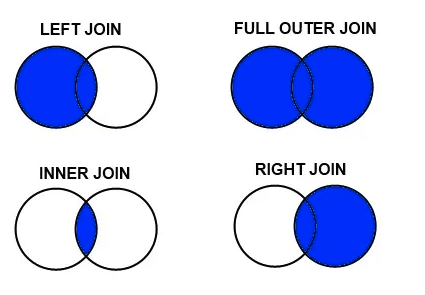




borrowed from [medium.com best visual sql joins](https://medium.com/swlh/the-best-visual-to-explain-sql-joins-612b95c81555)

In [ ]:
# Create DataFrames with indices
left = pd.DataFrame({
    'Value1': [1, 2, 3, 4]
}, index=['A', 'B', 'C', 'D'])

right = pd.DataFrame({
    'Value2': [5, 6, 7, 8]
}, index=['A', 'B', 'E', 'F'])
print("left:\n", left,'\n')
print("right:\n", right,'\n')




# Inner join (only common indices)
inner_join = left.join(right, how='inner')
print("Inner Join:\n", inner_join,'\n')

# Outer join (all indices, NaN for missing values)
outer_join = left.join(right, how='outer')
print("Outer Join:\n", outer_join,'\n')

# Left join (all indices from left DataFrame)
left_join = left.join(right, how='left')
print("Left Join:\n", left_join,'\n')

# Right join (all indices from right DataFrame)
right_join = left.join(right, how='right')
print("Right Join:\n", right_join)


### Merge

 merge allows for more flexibility in joining DataFrames using keys. You can specify which columns to use as keys for the join, and you can also join on multiple columns.

 ```pd.merge(left, right, on=key_column(s), how='join_type')```
 where left = df1
 and right = df2


In [ ]:
# Create DataFrames
left = pd.DataFrame({
    'Key': ['A', 'B', 'C', 'D'],
    'Value1': [1, 2, 3, 4]
})

right = pd.DataFrame({
    'Key': ['A', 'B', 'E', 'F'],
    'Value2': [5, 6, 7, 8]
})
print(left)
print(right,'\n\n')


# Inner merge (only common keys)
inner_merge = pd.merge(left, right, on='Key', how='inner')
print("Inner Merge:\n", inner_merge,'\n')

# Outer merge (all keys, NaN for missing values)
outer_merge = pd.merge(left, right, on='Key', how='outer')
print("Outer Merge:\n", outer_merge,'\n')

# Left merge (all keys from left DataFrame)
left_merge = pd.merge(left, right, on='Key', how='left')
print("Left Merge:\n", left_merge,'\n')

# Right merge (all keys from right DataFrame)
right_merge = pd.merge(left, right, on='Key', how='right')
print("Right Merge:\n", right_merge)

  Key  Value1
0   A       1
1   B       2
2   C       3
3   D       4
  Key  Value2
0   A       5
1   B       6
2   E       7
3   F       8 


Inner Merge:
   Key  Value1  Value2
0   A       1       5
1   B       2       6 

Outer Merge:
   Key  Value1  Value2
0   A     1.0     5.0
1   B     2.0     6.0
2   C     3.0     NaN
3   D     4.0     NaN
4   E     NaN     7.0
5   F     NaN     8.0 

Left Merge:
   Key  Value1  Value2
0   A       1     5.0
1   B       2     6.0
2   C       3     NaN
3   D       4     NaN 

Right Merge:
   Key  Value1  Value2
0   A     1.0       5
1   B     2.0       6
2   E     NaN       7
3   F     NaN       8


Wait is Merge and Join the same?

Merge, on a basic level, will more or less do the same thing but merge always for more flexibility with the ability to join on columns.

Take a look at this example:

In [ ]:
# Create DataFrames with indices
left = pd.DataFrame({'Key': ['A', 'B', 'C'],'Value1': [1, 2, 3]})
right = pd.DataFrame({'Key': ['B', 'C', 'D'],'Value2': [4, 5, 6]})
print(left)
print(right,'\n')

# Join on index
joined_df = left.join(right, how='outer',lsuffix='_')
print('Joined:\n',joined_df,'\n\n\n')

# Merge on 'Key' column
merged_df = pd.merge(left, right, on='Key', how='outer')
print('Merged:\n',merged_df)

  Key  Value1
0   A       1
1   B       2
2   C       3
  Key  Value2
0   B       4
1   C       5
2   D       6 

Joined:
   Key_  Value1 Key  Value2
0    A       1   B       4
1    B       2   C       5
2    C       3   D       6 



Merged:
   Key  Value1  Value2
0   A     1.0     NaN
1   B     2.0     4.0
2   C     3.0     5.0
3   D     NaN     6.0


### Exercises

1. Create two DataFrames, ```df1``` and ```df2```, with the following data:

```
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32]
})
```
```
df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
})
```


1.   Perform an inner merge on the ID column.
2.   Perform an outer merge on the ID column.
3. Perform a left merge on the ID column.
4. Perform a right merge on the ID column.


In [ ]:
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32]
})

df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
})


inner_merge = pd.merge(df1, df2, on='ID', how='inner')
outer_merge = pd.merge(df1, df2, on='ID', how='outer')
left_merge = pd.merge(df1, df2, on='ID', how='left')
right_merge = pd.merge(df1, df2, on='ID', how='right')

print("Inner Merge:\n", inner_merge,'\n')
print("Outer Merge:\n", outer_merge,'\n')
print("Left Merge:\n", left_merge,'\n')
print("Right Merge:\n", right_merge,'\n')

Inner Merge:
    ID   Name_x  Age   Name_y         City
0   3  Charlie   22  Charlie     New York
1   4    David   32    David  Los Angeles 

Outer Merge:
    ID   Name_x   Age   Name_y         City
0   1    Alice  24.0      NaN          NaN
1   2      Bob  27.0      NaN          NaN
2   3  Charlie  22.0  Charlie     New York
3   4    David  32.0    David  Los Angeles
4   5      NaN   NaN      Eve      Chicago
5   6      NaN   NaN    Frank      Houston 

Left Merge:
    ID   Name_x  Age   Name_y         City
0   1    Alice   24      NaN          NaN
1   2      Bob   27      NaN          NaN
2   3  Charlie   22  Charlie     New York
3   4    David   32    David  Los Angeles 

Right Merge:
    ID   Name_x   Age   Name_y         City
0   3  Charlie  22.0  Charlie     New York
1   4    David  32.0    David  Los Angeles
2   5      NaN   NaN      Eve      Chicago
3   6      NaN   NaN    Frank      Houston 



2.Create two DataFrames, ```left_df``` and ```right_df```, with the following data:
```
left_df = pd.DataFrame({
    'Age': [24, 27, 22, 32],
}, index=['Alice', 'Bob', 'Charlie', 'David'])
```
```
right_df = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
}, index=['Charlie', 'David', 'Eve', 'Frank'])
```



1.   Perform an inner join on the indices.
2. Perform an outer join on the indices.
3. Perform a left join on the indices.
4. Perform a right join on the indices.





In [ ]:
left_df = pd.DataFrame({
    'Age': [24, 27, 22, 32],
}, index=['Alice', 'Bob', 'Charlie', 'David'])

right_df = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
}, index=['Charlie', 'David', 'Eve', 'Frank'])

inner_join = left_df.join(right_df, how='inner')
outer_join = left_df.join(right_df, how='outer')
left_join = left_df.join(right_df, how='left')
right_join = left_df.join(right_df, how='right')

print("Inner Join:\n", inner_join,'\n')
print("Outer Join:\n", outer_join,'\n')
print("Left Join:\n", left_join,'\n')
print("Right Join:\n", right_join,'\n')